## Machine Feailure Project

### 1. Read the train Dataset.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### 2. Check missing values in df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

### 3. Seperate X and Y (Drop statistically insignificant)

In [6]:
X = df.drop(columns=['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]',
                     'Machine failure'])
Y = df[['Machine failure']]

In [7]:
X.head()

,id,Product ID,Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,L50096,140,0,0,0,0,0
1,1,M20343,200,0,0,0,0,0
2,2,L49454,25,0,0,0,0,0
3,3,L53355,197,0,0,0,0,0
4,4,M24050,34,0,0,0,0,0


### 4. Cat Con Seperation

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Product ID']

In [10]:
con

['id', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

### 5. Create Sklearn pipeline for feature selection (Ordinal)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [13]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-1.73203811e+00,  5.56416898e-01, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  2.75200000e+03],
       [-1.73201272e+00,  1.49443273e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  8.62000000e+03],
       [-1.73198733e+00, -1.24144677e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  2.34400000e+03],
       ...,
       [ 1.73198733e+00,  1.71330309e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  5.50200000e+03],
       [ 1.73201272e+00, -9.75675621e-01, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  5.02400000e+03],
       [ 1.73203811e+00,  1.94780704e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  1.45300000e+03]])

In [14]:
cols = pre1.get_feature_names_out()
cols

array(['num__id', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF', 'cat__Product ID'],
      dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__id,num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID
0,-1.732038,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2752.0
1,-1.732013,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,8620.0
2,-1.731987,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2344.0
3,-1.731962,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,4704.0
4,-1.731937,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,9727.0


### 6. Find Mutual Info Scores

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([7.26474495e-05, 6.50754576e-03, 7.62972189e-03, 2.39592196e-02,
       1.10777567e-02, 1.93368574e-02, 1.12448253e-03, 1.84981172e-02])

In [17]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__HDF                0.023959
num__OSF                0.019337
cat__Product ID         0.018498
num__PWF                0.011078
num__TWF                0.007630
num__Tool wear [min]    0.006508
num__RNF                0.001124
num__id                 0.000073
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

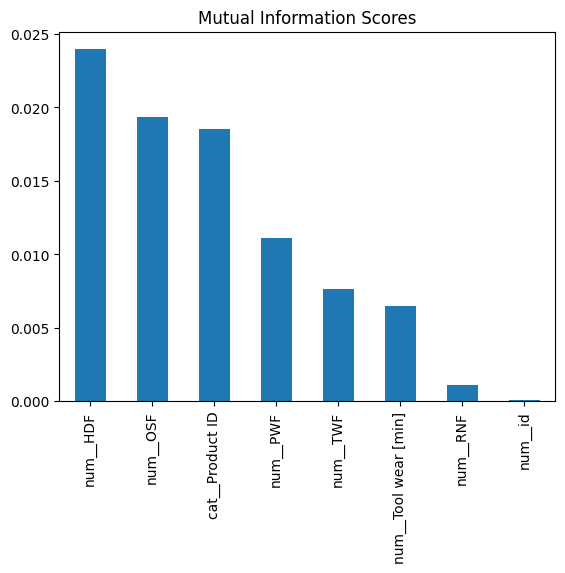

In [18]:
mi.plot(kind='bar',title='Mutual Information Scores')

In [19]:
sel_cols = list(mi[0:6].index)
sel_cols

['num__HDF',
 'num__OSF',
 'cat__Product ID',
 'num__PWF',
 'num__TWF',
 'num__Tool wear [min]']

In [20]:
# Approach 2 Select top n features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [21]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'cat__Product ID'], dtype=object)

In [22]:
sel_cols[0].split('__')[1]

'Tool wear [min]'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'Product ID']

In [25]:
X_sel = X[imp_cols]

In [26]:
X_sel

,Tool wear [min],TWF,HDF,PWF,OSF,Product ID
0,140,0,0,0,0,L50096
1,200,0,0,0,0,M20343
2,25,0,0,0,0,L49454
3,197,0,0,0,0,L53355
4,34,0,0,0,0,M24050
...,...,...,...,...,...,...
136424,210,0,0,0,0,M22284
136425,2,0,0,0,0,H38017
136426,214,0,0,0,0,L54690
136427,42,0,0,0,0,L53876


In [27]:
## Cat , con for Selected features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat

['Product ID']

In [29]:
con

['id', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

### 7. Build the final sklearn pipeline (Onehotencoder)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])


In [32]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

<136429x9981 sparse matrix of type '<class 'numpy.float64'>'
	with 818574 stored elements in Compressed Sparse Row format>

In [33]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Tool wear [min]', 'num__TWF', 'num__HDF', ...,
       'cat__Product ID_M24855', 'cat__Product ID_M24857',
       'cat__Product ID_M24859'], dtype=object)

In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [35]:
xtrain.shape

(109143, 9981)

In [36]:
xtest.shape

(27286, 9981)

### 8. Algo Evaluation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [38]:
dct = {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier(),}

In [39]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain, ytrain)

    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain, ypred_tr)

    # Calculate F1 Cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)

    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

     # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n===========================================\n')

### 9. Hyperparameter tune the top model

In [44]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [46]:
rscv.best_params_

{'C': 0.001}

In [47]:
rscv.best_score_

0.8621283590503299

In [48]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.001)

### 10. ROC AUC curveuation (Select Best model , Skip KNN and SVM)

In [49]:
yprob_tr = best_lr.predict_proba(xtrain)[:,1]
yprob_ts = best_lr.predict_proba(xtest)[:,1]

In [50]:
yprob_tr[0:5]

array([0.00445229, 0.00451295, 0.00409143, 0.0040161 , 0.00481982])

In [51]:
yprob_ts[0:5]

array([0.88463886, 0.00538886, 0.00473955, 0.00486929, 0.00551417])

In [52]:
## Check roc_auc score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.9027885188663485

#### Plot the ROC AUC Curv

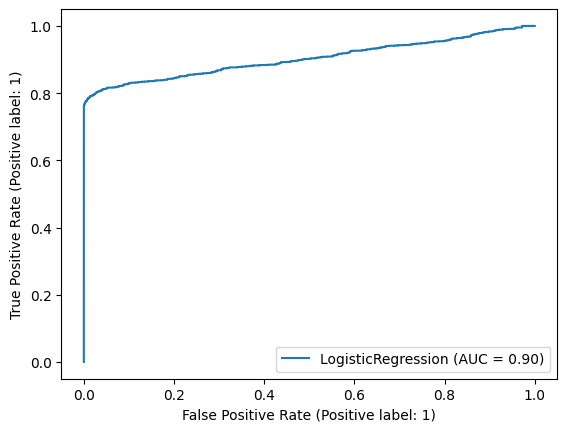

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain, ytrain)

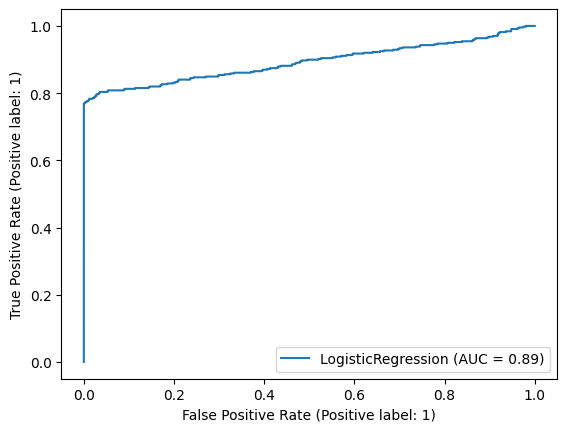

In [54]:
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

### 11. Predict the testing file (Id, Machine Failure, Prob)

In [55]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [59]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[-0.69427087, -0.03945048, -0.07202055, ...,  0.        ,
         0.        ,  0.        ],
       [-1.36651555, -0.03945048, -0.07202055, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13146138, -0.03945048, -0.07202055, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.29119596, -0.03945048, -0.07202055, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5535685 , -0.03945048, -0.07202055, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19399576, -0.03945048, -0.07202055, ...,  0.        ,
         0.        ,  0.        ]])

In [67]:
xnew_pre = pd.DataFrame(xnew_pre)
xnew_pre.head()

,0,1,2,3,4,5,6,7,8,9,...,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980
0,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Predict values
preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [69]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [70]:
probs[0:5]

array([0.00432636, 0.00402294, 0.00459765, 0.00394223, 0.00473871])

In [72]:
df_res = xnew[['id']]
df_res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [73]:
df_res['Machine failure']=preds
df_res['Prob']=probs
df_res

,id,Machine failure,Prob
0,136429,0,0.004326
1,136430,0,0.004023
2,136431,0,0.004598
3,136432,0,0.003942
4,136433,0,0.004739
...,...,...,...
90949,227378,0,0.004009
90950,227379,0,0.004123
90951,227380,0,0.005362
90952,227381,0,0.004401


<Axes: xlabel='Machine failure'>

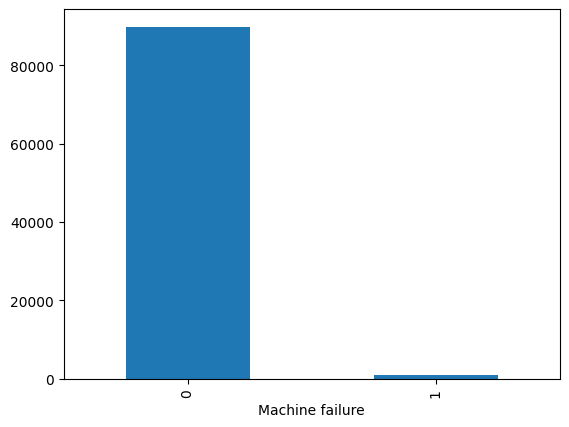

In [75]:
df_res['Machine failure'].value_counts().plot(kind='bar')

In [76]:
df_res.to_csv('results.csv',index=False)